In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [136]:
sns.set_style('white') # darkgrid, white grid, dark, white and ticks
sns.set_palette(sns.dark_palette('#2ecc71'))
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('font', size=14)          # controls default text sizes

In [157]:
headers = ['Size', 'Workers', 'Native Threads', 'FastFlow', 'Speedup Native', 'Speedup FastFlow']
matrix256 = pd.read_csv("../build/output_256.csv", names=headers)
matrix512 = pd.read_csv("../build/output_512.csv", names=headers)
matrix1024 = pd.read_csv("../build/output_1024.csv", names=headers)
matrix2048 = pd.read_csv("../build/output_2048.csv", names=headers)
matrix4096 = pd.read_csv("../build/output_4096.csv", names=headers)
matrix8192 = pd.read_csv("../build/output_8192.csv", names=headers)

matricies = [
    matrix256, matrix512, matrix1024, matrix2048, matrix4096, matrix8192
]

In [158]:
matrix256

,Size,Workers,Native Threads,FastFlow,Speedup Native,Speedup FastFlow
0,256,2,36851,49301,1.889148,1.412081
1,256,4,26792,35471,2.427964,1.833892
2,256,6,18281,40400,3.553744,1.608069
3,256,8,16003,47814,4.229707,1.415652
4,256,10,16779,49057,3.858871,1.319852
5,256,12,14514,55063,4.464448,1.176779
6,256,14,24722,60599,2.567025,1.047245
7,256,16,22766,68346,2.734121,0.910734
8,256,18,24484,75022,2.574538,0.840220
9,256,20,25485,83637,2.479419,0.755503


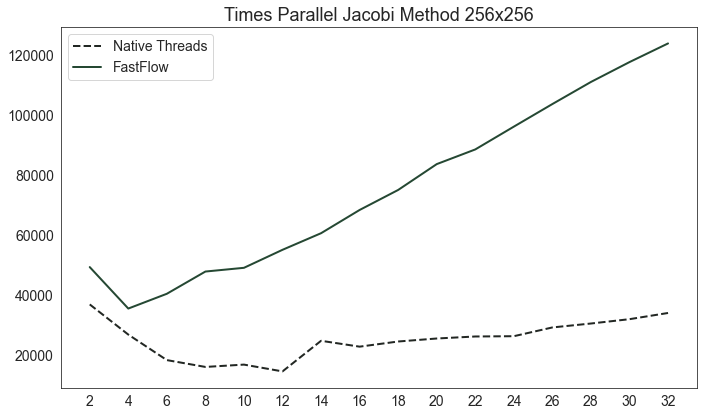

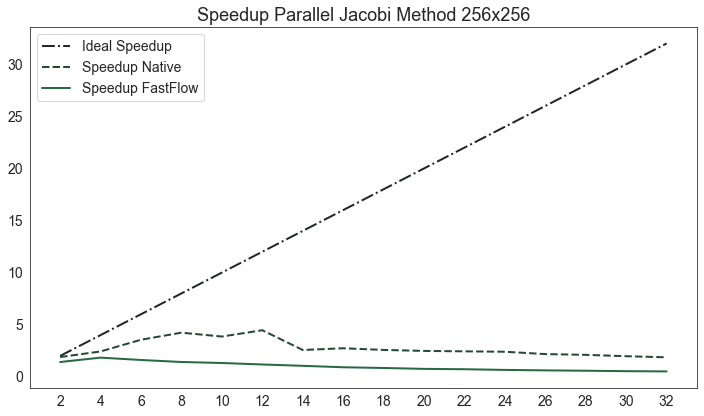

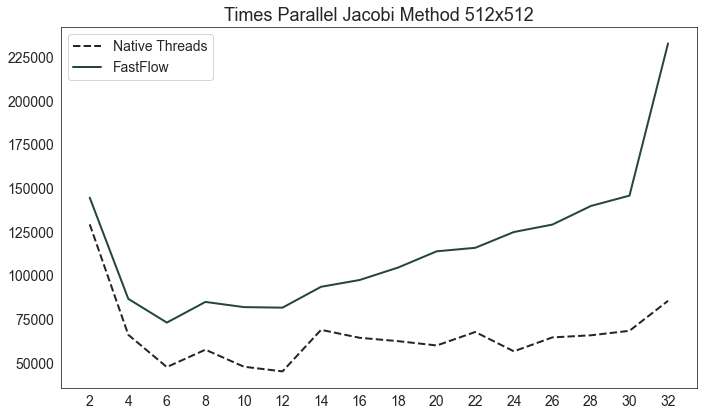

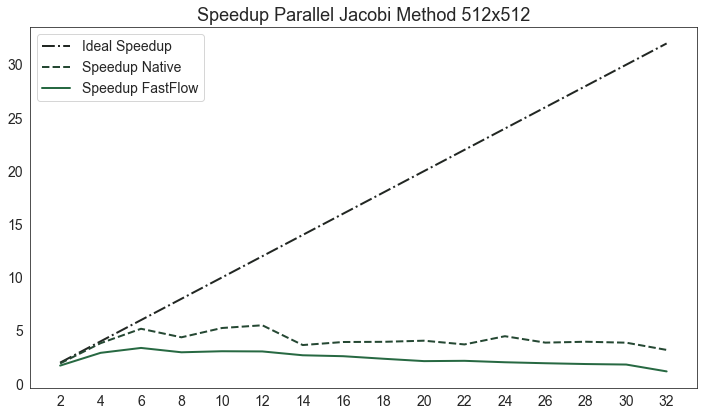

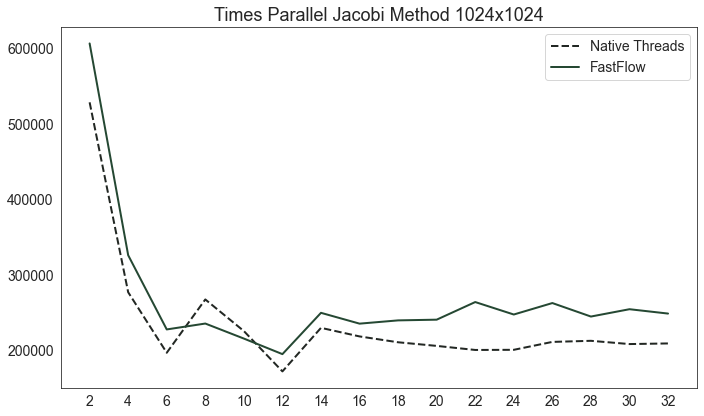

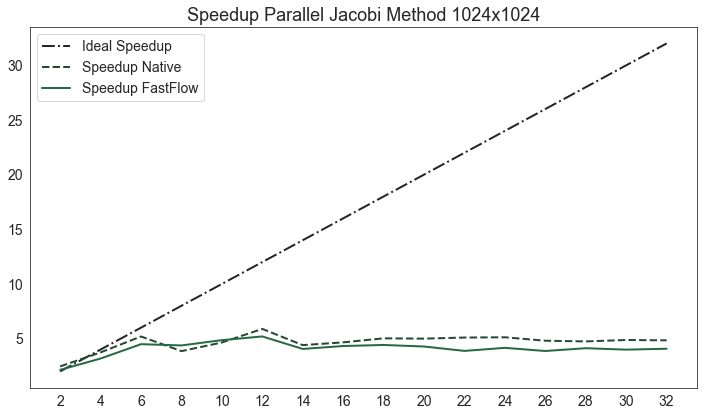

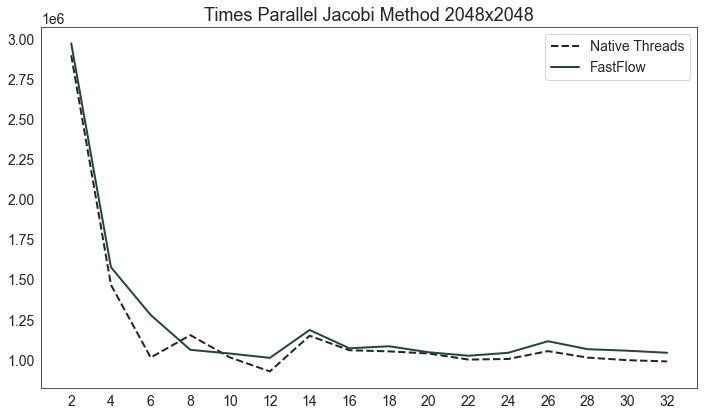

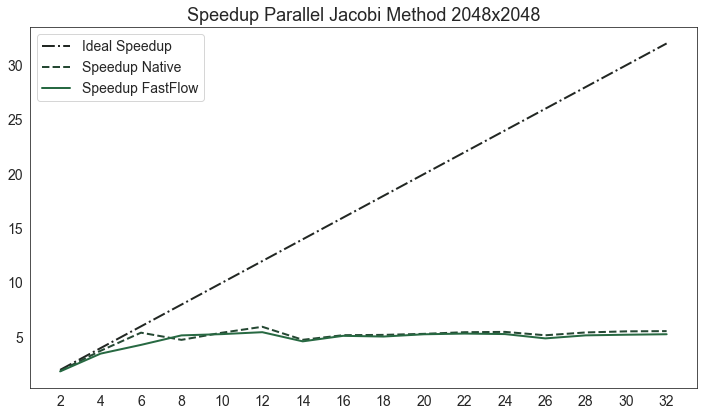

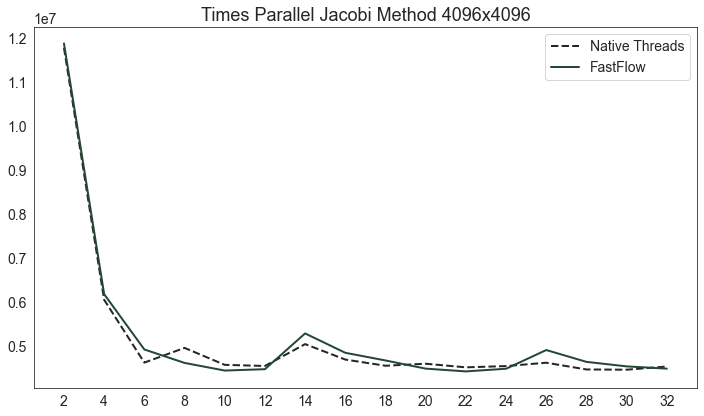

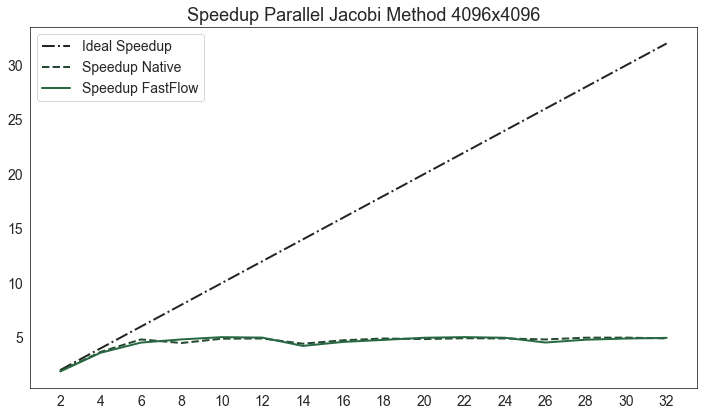

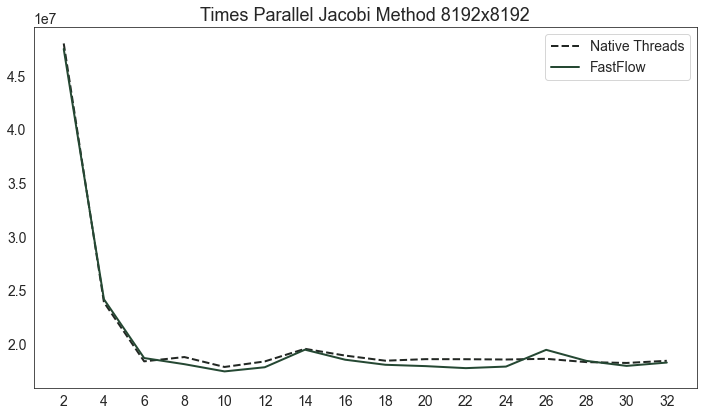

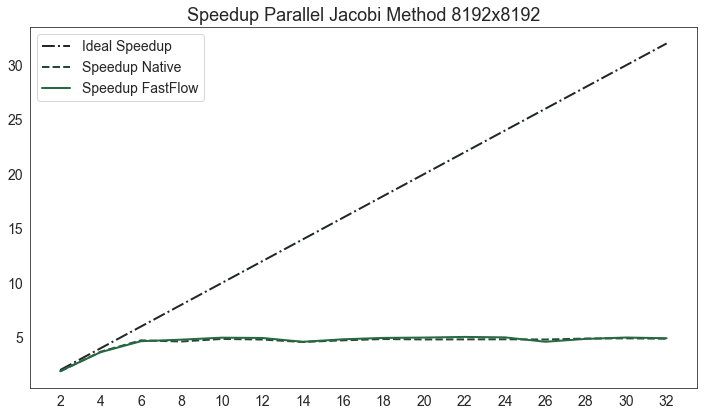

In [159]:
size = 256
plot = 0
for matrix in matricies:
    time_plot = pd.DataFrame({
        "Workers":matrix['Workers'], 
        "Native Threads":matrix['Native Threads'], 
        "FastFlow": matrix['FastFlow'], 
        'Speedup Native': matrix['Speedup Native'], 
        'Speedup FastFlow':matrix['Speedup FastFlow'],
        'Ideal Speedup': [i * 2 for i in range(1,17)]
    })
    plt.figure(plot, figsize=(10,6), tight_layout=True)
    plt.plot('Workers', 'Native Threads', data=time_plot, linestyle='--', linewidth=2)
    plt.plot('Workers', 'FastFlow', data=time_plot, marker='', linewidth=2)
    
    plt.xticks([i * 2 for i in range(1,17)])
    plt.legend()
    plt.title(f"Times Parallel Jacobi Method {size}x{size}")

    plt.savefig(f'./images/times_plot_{size}.png')
    plot +=1
    plt.figure(plot, figsize=(10,6), tight_layout=True)
    plt.plot('Workers', 'Ideal Speedup', data=time_plot, linestyle='-.', linewidth=2)
    plt.plot('Workers', 'Speedup Native', data=time_plot, linestyle='--', linewidth=2)
    plt.plot('Workers', 'Speedup FastFlow', data=time_plot, marker='', linewidth=2)
    
    plt.xticks([i * 2 for i in range(1,17)])
    plt.legend()
    plt.title(f"Speedup Parallel Jacobi Method {size}x{size}")

    plt.savefig(f'./images/speedup_plot_{size}.png')
    plot+=1
    size *= 2